<a href="https://colab.research.google.com/github/AlexanderSychev2005/stat_un/blob/main/rgr_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import mode


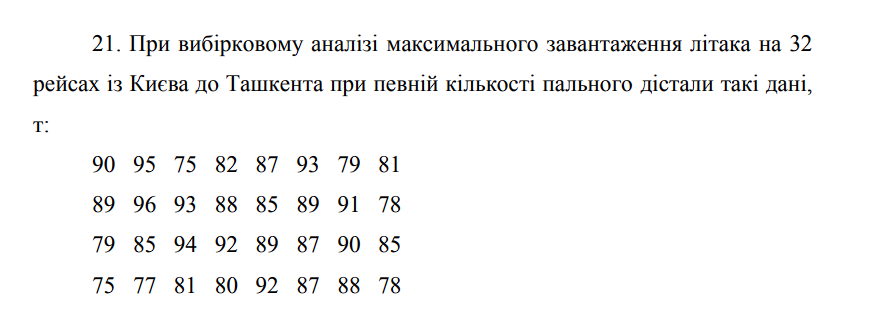

In [ ]:
# Data
weights = np.array([
    90, 95, 75, 82, 87, 93, 79, 81,
    89, 96, 93, 88, 85, 89, 91, 78,
    79, 85, 94, 92, 89, 87, 90, 85,
    75, 77, 81, 80, 92, 87, 88, 78
])

In [ ]:
# Дискретний розподіл
unique, counts = np.unique(weights, return_counts=True)

In [ ]:
n = len(weights)
max_value = np.max(weights)
min_value = np.min(weights)

In [ ]:
relative_freq = counts / n

In [ ]:
discrete_df = pd.DataFrame({'Value': unique, 'Frequency': counts, 'Relative Frequency': relative_freq})


## Дискретний статистичний розподіл

In [ ]:
discrete_df

,Value,Frequency,Relative Frequency
0,75,2,0.06250
1,77,1,0.03125
2,78,2,0.06250
3,79,2,0.06250
4,80,1,0.03125
5,81,2,0.06250
6,82,1,0.03125
7,85,3,0.09375
8,87,3,0.09375
9,88,2,0.06250


In [ ]:
num_of_intervals = int(4 * np.log10(len(weights)) + 1)
print("Number of intervals: ", num_of_intervals)
interval_step = (max_value - min_value) / num_of_intervals
print("Interval step: ", int(np.round_(interval_step)))

Number of intervals:  7
Interval step:  3


In [ ]:
hist, bin_edges = np.histogram(weights, bins=num_of_intervals)
hist, bin_edges

(array([3, 5, 3, 3, 8, 5, 5]), array([75., 78., 81., 84., 87., 90., 93., 96.]))

In [ ]:
relative_hist = hist / len(weights)
intervals = [f"({bin_edges[i]:.1f}, {bin_edges[i+1]:.1f})" for i in range(len(bin_edges)-1)]
interval_df = pd.DataFrame({'Interval': intervals, 'Frequency': hist, 'Relative Frequency': relative_hist})

In [ ]:
interval_df

,Interval,Frequency,Relative Frequency
0,"(75.0, 78.0)",3,0.09375
1,"(78.0, 81.0)",5,0.15625
2,"(81.0, 84.0)",3,0.09375
3,"(84.0, 87.0)",3,0.09375
4,"(87.0, 90.0)",8,0.25000
5,"(90.0, 93.0)",5,0.15625
6,"(93.0, 96.0)",5,0.15625


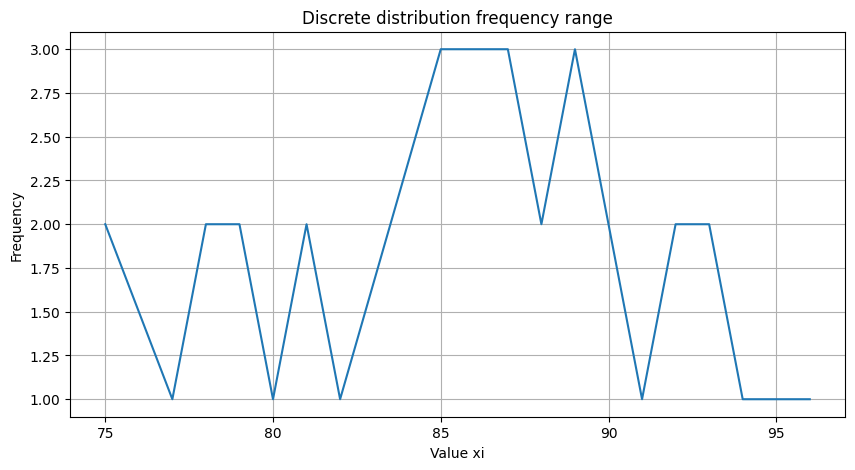

In [ ]:
# Полігон частот дискретного розподілу
plt.figure(figsize=(10, 5))
plt.plot(unique, counts)
plt.xlabel('Value xi')
plt.ylabel('Frequency')
plt.title('Discrete distribution frequency range')
plt.grid()
plt.show()

In [ ]:
centres = (bin_edges[:-1] + bin_edges[1:]) / 2
centres

array([76.5, 79.5, 82.5, 85.5, 88.5, 91.5, 94.5])

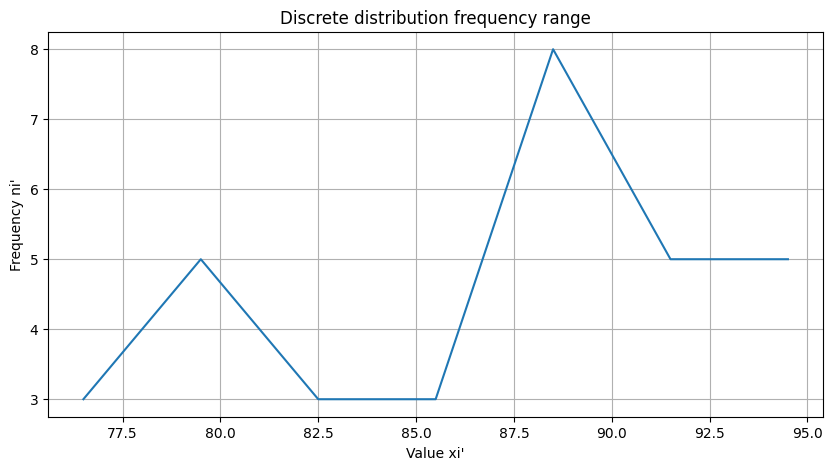

In [ ]:
# Полігон частот інтервального розподілу
plt.figure(figsize=(10, 5))
plt.plot(centres, hist)
plt.xlabel("Value xi'")
plt.ylabel("Frequency ni'")
plt.title('Discrete distribution frequency range')
plt.grid()
plt.show()

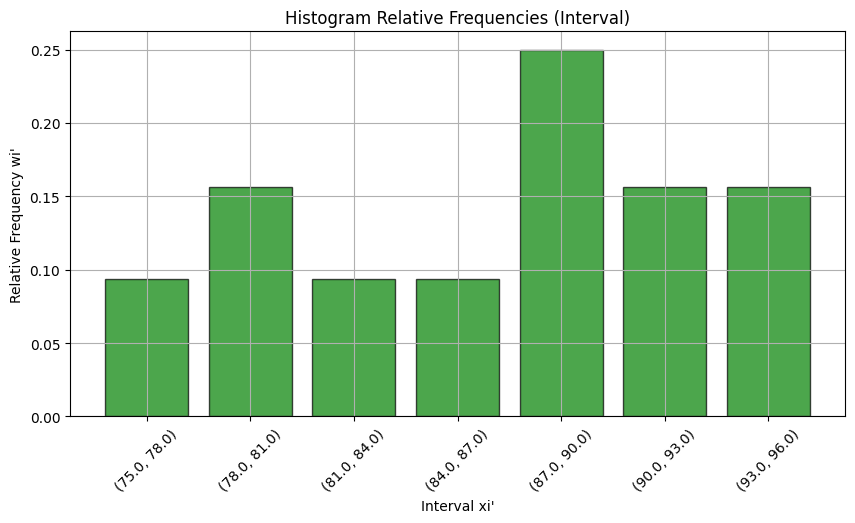

In [ ]:
# Графік відносних частот (інтервальний)
plt.figure(figsize=(10, 5))
plt.bar(intervals, relative_hist, alpha=0.7, color='g', edgecolor='black')
plt.xlabel("Interval xi'")
plt.ylabel("Relative Frequency wi'")
plt.title('Histogram Relative Frequencies (Interval)')
plt.xticks(rotation=45)
plt.grid()
plt.show()

[0.0625  0.03125 0.0625  0.0625  0.03125 0.0625  0.03125 0.09375 0.09375
 0.0625  0.09375 0.0625  0.03125 0.0625  0.0625  0.03125 0.03125 0.03125] [0.0625  0.09375 0.15625 0.21875 0.25    0.3125  0.34375 0.4375  0.53125
 0.59375 0.6875  0.75    0.78125 0.84375 0.90625 0.9375  0.96875 1.     ]


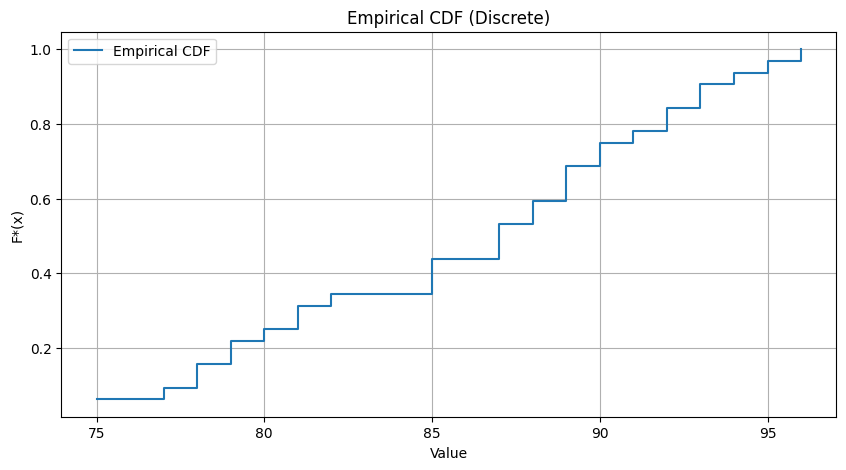

In [ ]:
# Емпірична функція розподілу (дискретна)
empirical_cdf = np.cumsum(relative_freq)
print(relative_freq, empirical_cdf)
plt.figure(figsize=(10, 5))
plt.step(unique, empirical_cdf, where='post', label='Empirical CDF')
plt.xlabel('Value')
plt.ylabel('F*(x)')
plt.title('Empirical CDF (Discrete)')
plt.legend()
plt.grid()
plt.show()

In [ ]:
cdf_interval = np.cumsum(relative_hist)
print(cdf_interval)
print(bin_edges[:-1])

[0.09375 0.25    0.34375 0.4375  0.6875  0.84375 1.     ]
[75. 78. 81. 84. 87. 90. 93.]


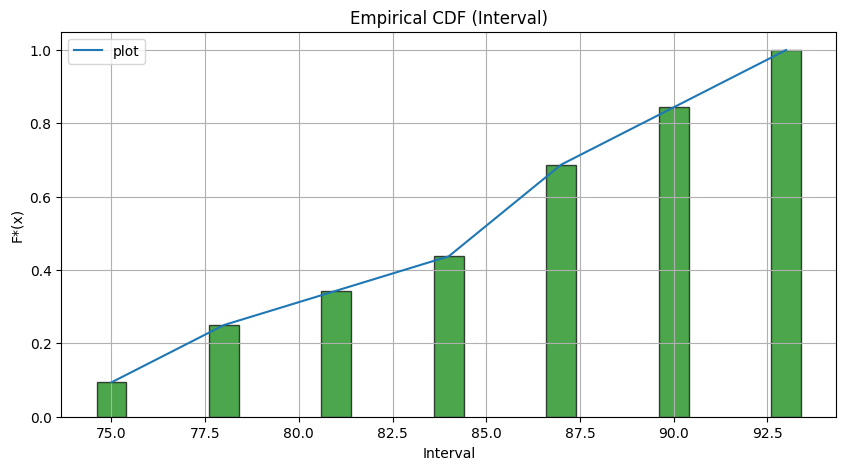

In [ ]:
# Емпірична функція розподілу (інтервальна)
cdf_interval = np.cumsum(relative_hist)
plt.figure(figsize=(10, 5))
plt.bar(bin_edges[:-1], cdf_interval, alpha=0.7, color='g', edgecolor='black')
plt.plot(bin_edges[:-1], cdf_interval, label='plot')
plt.xlabel('Interval')
plt.ylabel('F*(x)')
plt.title('Empirical CDF (Interval)')
plt.legend()
plt.grid()
plt.show()

In [ ]:
# Мода та медіана
mode_value, mode_count = mode(weights)
median_value = np.median(weights)
mode_value
print(f"Mode (discrete): {mode_value}, Frequency: {mode_count}")
print(f"Median (discrete): {median_value}")

Mode (discrete): 85, Frequency: 3
Median (discrete): 87.0
